<a href="https://colab.research.google.com/github/contreras-juan/UPTC_Diplomado_Ciencia_de_Datos/blob/main/metodos_supervisados/Regresión_Logística.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://storage.googleapis.com/adonaivera_certified/banner.png">
    
##  Diplomado en Ciencia de Datos - Cohorte 2024

Autor: [Juan Felipe Contreras](https://www.linkedin.com/in/juanf-contreras/)

<h1 align='center'> Regresión Logística </h1>

<h2> Introducción a los modelos de clasificación </h2>

Los modelos de clasificación en Machine Learning son una herramienta fundamental en el análisis de datos y la toma de decisiones automatizada. En esencia, estos modelos buscan categorizar datos en clases o categorías predefinidas, utilizando patrones identificados en conjuntos de datos de entrenamiento. Desde la perspectiva de la inteligencia artificial, la clasificación es un problema de aprendizaje supervisado, donde el algoritmo aprende de ejemplos etiquetados para luego aplicar ese conocimiento a nuevos datos no etiquetados. Una amplia gama de algoritmos, desde los clásicos como la Regresión Logística hasta los más complejos como las Máquinas de Vectores de Soporte (SVM) o las Redes Neuronales, se emplean en la construcción de estos modelos, cada uno con sus propias fortalezas y aplicaciones específicas. La precisión, interpretabilidad y eficiencia computacional son consideraciones clave al seleccionar el modelo adecuado para un problema de clasificación particular.

Un ejemplo emblemático de un modelo de clasificación en Machine Learning es la Regresión Logística. Este algoritmo se utiliza ampliamente en problemas donde la tarea es predecir la probabilidad de que una instancia pertenezca a una de dos clases mutuamente excluyentes. Por ejemplo, en un escenario médico, la Regresión Logística podría emplearse para predecir si un paciente tiene cierta enfermedad en función de variables como su edad, género, niveles de ciertos biomarcadores, etc. El modelo aprenderá a asignar pesos a cada característica de entrada y utilizará una función logística para calcular la probabilidad de que un paciente pertenezca a la clase de interés. Si la probabilidad calculada supera un umbral predeterminado, el modelo clasificará al paciente en la clase positiva; de lo contrario, lo clasificará en la clase negativa. Este enfoque es útil en una variedad de campos, desde la medicina hasta la detección de spam en correos electrónicos.

De esta manera, consideremos una variable $y$ que se define de la siguiente manera:

$$ y = \begin{cases}
1 & \text{ Si el paciente está enfermo} \\
0 & \text{ Si el paciente no está enfermo }  
\end{cases} $$

Y definimos la probabilidad de que un paciente se encuentre enfermo como

$$p(y = 1 | \mathbf{x}) = f(\mathbf{x})$$

donde $\mathbf{x}$ es un vector de variables sociodemográficas que pueden afectar el riesgo de contraer una enfermedad dada (e.g. La edad, el sexo, la altura, el índice de masa corporal). Por lo general, clasificamos a la persona como enferma si $p(y = 1 | \mathbf{x}) \geq 0.5$, aunque esto puede cambiar dependiendo del ejercicio que se esté realizando. 

<h2> El modelo de regresión logísitca </h2>

La regresión logística es tal vez el modelo de clasificación más famoso y fácil de implementar en cualquier lenguaje de programación o software especializado. En particula esta técnica consiste en estimar la probabilidad de un suceso de la siguiente manera:

$$\mathbf{\hat{p}} = p(y = | \mathbf{x}) = \sigma(x^{T} \mathbf{\beta})$$

donde 

$$\sigma(t) = \frac{1}{1 + e^{-t}}$$

y definimos la predicción, $\hat{y}$, como

$$ \hat{y} = \begin{cases}
1 & \text{ Si } \hat{p} \geq 0.5\\
0 & \text{ Si }  \hat{p} < 0.5
\end{cases} $$

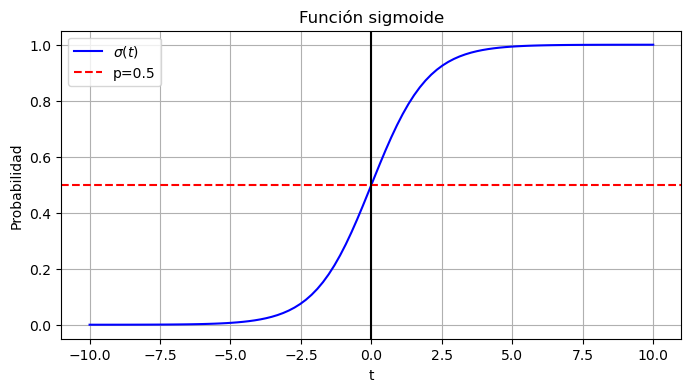

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x = np.linspace(-10, 10, 100)

# Compute y values using the sigmoid function
y = sigmoid(x)

# Plot the sigmoid function
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='$\sigma(t)$', color='blue')
plt.title('Función sigmoide')
plt.xlabel('t')
plt.ylabel('Probabilidad')
plt.axhline(0.5, color='red', linestyle='--', label='p=0.5')
plt.axvline(0, color='black', linestyle='-')  # Adding vertical line at x=0
plt.grid(True)
plt.legend()
plt.show()

**Función de pérdida**

Para introducir la función de pérdida, primero debemos comprender el concepto de la **Función de verosimilitud**. Este es un un concepto fundamental en estadística y análisis probabilístico que describe la probabilidad de observar ciertos datos, dados diferentes valores para los parámetros de un modelo estadístico. En términos simples, representa qué tan verosímil es que los datos observados se produzcan bajo ciertas condiciones asumidas por el modelo. Esta función es crucial en métodos como la estimación de máxima verosimilitud, donde el objetivo es encontrar los valores de los parámetros del modelo que maximizan esta función, lo que implica que los datos observados son más probables bajo esas condiciones.

Para el caso del modelo de regresión logística, definimos la función de verosimilitud como

$$f(\mathbf{\beta}) = \prod_{i=1}^{N} \sigma_{i}(\mathbf{x_{i}} \vert \mathbf{\beta_{i}}) $$

en dónde, $\sigma_{i}(\bullet)$ corresponde a la función sigmoide evaluada con los datos de la observacione $i$, $x_{i}$ es el vector de características de la observación $i$ y $\beta$ es el vector de parámetros a estimar para la observación $i$.

Considere primero un ejemplo pequeño en el que contamos con una muestra de 5 observaciones, tal que observamos los siguientes vectores

$$y = \begin{pmatrix}
1 \\
 1\\
0 \\
0 \\
0
\end{pmatrix}$$

$$\hat{p} = \begin{pmatrix}
0.7 \\
 0.8\\
0.3 \\
0.1 \\
0.5
\end{pmatrix}$$

La función de verosimilitud para este problema es

$$L(\mathbf{p}) = (0.7)(0.8)(0.3)(0.1)(0.5) = 0.0084$$

En particular, se quiere que la función de verosimilitud sea lo más grande posible para maximizar la probabilidad de que lo que realmente se observó ocurra.

Note que la función de verosimilitud no puede ser una función de pérdida porque el interés está en maximizarla, en cuánto a que las funciones de pérdida deben ser minimizadas. Por lo que definimos la función de pérdida como el recíproco del logaritmo de la función de verosimilitud, esto es:

$$J(\mathbf{\beta}) = - \frac{1}{N} \sum_{i = 1}^{N} \left[y_{i} log(\hat{p}_{i}) + (1 - y_{i})(log(1 - \hat{p}_{i}))\right]$$

A diferencia que con el caso de regresión lineal, no existe una ecuación que defina el estimador $\hat{\beta}$ que minimice esta función; por lo que es necesario aplicar técnicas computacionales para alcanzar el óptimo.

<h2> Métricas de evaluación </h2>

Como en todos los modelos de predicción, necesitamos contar con algún tipo de métrica de valoración que nos permita dar cuenta de qué tan acertados han sido nuestros entrenamientos. Para ello, consideremos el siguiente ejemplo:

Supongamos que se está trabajando en un proyecto de detección del cáncer por medio de un modelo de aprendizaje de máquinas que utiliza variables sociodemográficas (p.ej. Edad, sexo, historial familiar). Has entrenado tu modelo con un conjunto de datos y ahora quieres evaluar su rendimiento utilizando una muestra de 100 pacientes.

Aquí está el resultado de la clasificación por parte del modelo:

- Identificó correctamente 60 pacientes con cáncer.
- Identificó incorrectamente 10 pacientes como si tuvieran cáncer cuando en realidad no lo tenían.
- Identificó correctamente 25 pacientes que no tenían cáncer.
- Identificó incorrectamente 5 pacientes como si no tuvieran cáncer cuando en realidad sí lo tenían.

Con esta información podemos armar una *Matriz de Confusión:*

|                    | Predicción: No tiene cáncer          | Predicción: Tiene cáncer              |
|--------------------|-------------------------------|-------------------------------|
| Realidad: No tiene cáncer | 60 (Verdaderos Negativos)    | 10 (Falsos Positivos)        |
| Realidad: Tiene cáncer     | 5 (Falsos Negativos)         | 25 (Verdaderos Positivos)    |

Con base en esta matriz podemos calcular las siguientes estadísticas:

**Exactitud (accuracy en inglés):**

Mide la proporción de casos clasificados de manera correcta sobre el total de la muestra de prueba. Se calcula como

$$\text{exactidud} = \frac{VP + VN}{VP + VN + FP + FN}$$

**Precisión (precision en inglés):**

Mide la proporción de casos positivos clasificados de manera correcta sobre el total de casos clasificados de manera correcta. Se calcula como

$$\text{precision} = \frac{VP}{VP + FP}$$

**Sensibilidad (recall en inglés)**

Mide la proporción de casos clasificadso positivos de manera correcta sobre el total de casos positivos reales. Se calcula como

$$\text{sensibilidad} = \frac{VP}{VP + FN}$$

Para el ejemplo anterior, tenemos:

- Exactitud = 0.85
- Precisión = 0.714
- Sensibilidad = 0.833

**N.B:** Queda como tarea revisar que estos cálculos son correctos.

Algunas preguntas que vale la pena hacerse son: ¿Qué tan bueno es nuestro modelo con base en los resultados anteriores?, ¿Cuál de las tres estadísticas priorizamos?, ¿Existe alguna métrica que combine la información conjunta de la matriz de confusión?

La respuesta a las primeras dos preguntas depende de la aplicación en concreto y, en algunos casos, como este, la ética y lo delicado de los resultados juegan un papel fundamental. La tercera pregunta tiene una respuesta objetiva: sí, existe una estadística llamada *Puntuación F1* que corresponde a la media armónica entre la precisión y la sensibilidad:

$$F1 = \frac{2}{\frac{1}{\text{precision}} + \frac{1}{\text{sensibilidad}}} = \frac{2VP}{2VP + FP + FN}$$

La razón para usar la media armónica (en lugar de alguna medida de tendencia central más común) es que está estadística da más prioridad a los valores pequeños de la distribución, por lo que es una estadística adecuada para este caso.

La puntuación F1 del ejercicio anterior es aproximadamente 0.77.

<h2> Ejercicio práctico: Datos Iris </h2>

Para este ejemplo vamos a utilizar los datos Iris, que son unos de los datos de juguete más utilizados en el aprendizaje de máquinas y en modelos de inteligencia artificial. Este ejercicio consiste en utilizar los datos utilizados en la investigación del biólogo Ronald Fisher "The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis" en el que se pretende estudiar la relación entre las dimensiones morfológicas de un conjunto de flores (Iris) con la pertenencia a una de tres especies: Virgínica, Setosa y Versicolor.

En este ejercicio práctico intentaremos predecir si una flor pertenece a la especie Versicolor.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

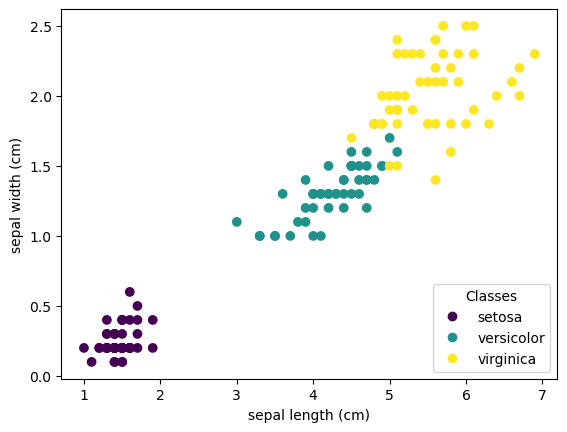

In [6]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(x=iris.data['petal length (cm)'], 
                     y=iris.data['petal width (cm)'], 
                     c=iris.target)

ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [8]:
X = iris.data[['petal width (cm)', 'sepal length (cm)']].values
y = iris.target_names[iris.target] == 'setosa'

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [10]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_pred = log_reg.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

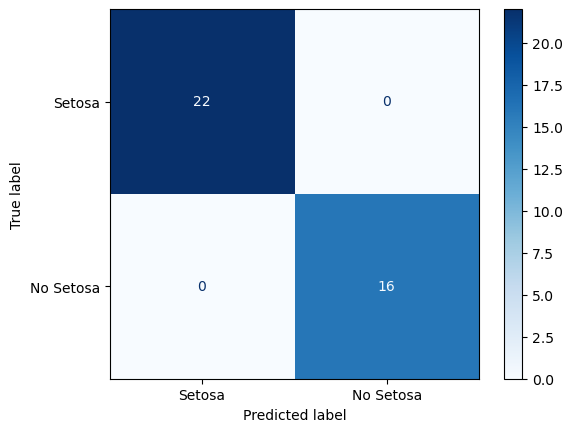

In [13]:
disp = ConfusionMatrixDisplay.from_estimator(
    log_reg,
    X_test,
    y_test,
    display_labels=['Setosa', 'No Setosa'],
    cmap=plt.cm.Blues,
)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        22
        True       1.00      1.00      1.00        16

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



<h2> Clasificación multiclase </h2>

De la misma manera que existe el modelo de clasificación para una variable dependiente con dos categorías, existen los modelos de clasificación que permiten variables con más de dos categorías y el modelo de regresión logística cuenta con una versión para este tipo de problemas multiclase llamado modelo de regresión logística multinomial; para este caso utilizamos la función softmax:

$$P \left( y_{i} = j | \mathbf{x}_{i} \right) = \sigma\left(\mathbf{x}_{i} \right) = \frac{e^{\mathbf{x}^{T} \mathbf{\beta}_{j}}}{\sum_{k = 1}^{K} e^{\mathbf{x}^{T} \mathbf{\beta}_{k}}}$$

Supongamos el siguiente ejemplo en el que queremos clasificar a un animal entre perro, gato o ave con base en la siguiente matriz de datos:

| Individuo | Peso | Altura | Clase   |
|------------|--------|--------|---------|
| 1          | 5      | 3      | Gato     |
| 2          | 4      | 2      | Perro    |
| 3          | 3      | 1      | Ave   |
| 4          | 6      | 4      | Gato     |

Para este caso, el modelo deberá de encontrar los siguientes vectores: $\mathbf{\beta}_{Gato}$, $\mathbf{\beta}_{Perro}$ y $\mathbf{\beta}_{Ave}$. Suponga que los resultados finales son:

$$\mathbf{\hat{\beta}}_{Gato} =  \begin{pmatrix}
0.1 \\
0.2
\end{pmatrix}$$

$$\mathbf{\hat{\beta}}_{Perro} =  \begin{pmatrix}
0.2 \\
0.3
\end{pmatrix}$$

$$\mathbf{\hat{\beta}}_{Ave} =  \begin{pmatrix}
0.3 \\
0.4
\end{pmatrix}$$

De esta manera, para el individuo 1 podemos calcular:

$$P_{1} (y = \text{Gato} | \mathbf{x}_{1}) = \frac{e^{(5*0.1 + 3*0.2)}}{e^{(5*0.1 + 3*0.2)} + e^{(5*0.2 + 3*0.3)} + e^{(5*0.3 + 3*0.4)}} = 0.087$$

Siguiendo la misma lógica para todas las clases y todos los individuos podemos diligenciar la siguiente matriz:

| Individuo | Probabilidad (Gato) | Probabilidad (Perro) | Probabilidad (Ave) |
|------------|--------------------|--------------------|---------------------|
| 1          | 0.087              | 0.236              | 0.676               |
| 2          | 0.061              | 0.168              | 0.771               |
| 3          | 0.042              | 0.115              | 0.843               |
| 4          | 0.047              | 0.128              | 0.825               |

**N.B:** Como tarea puede hacer el ejercicio y verificar que los datos consignados en el ejercicio anterior es correcto.

<h3> Ejercicio práctico multiclase: Datos Iris </h3>

In [15]:
df = iris.data
df['target'] = iris.target
df['target'] = df['target'].replace({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


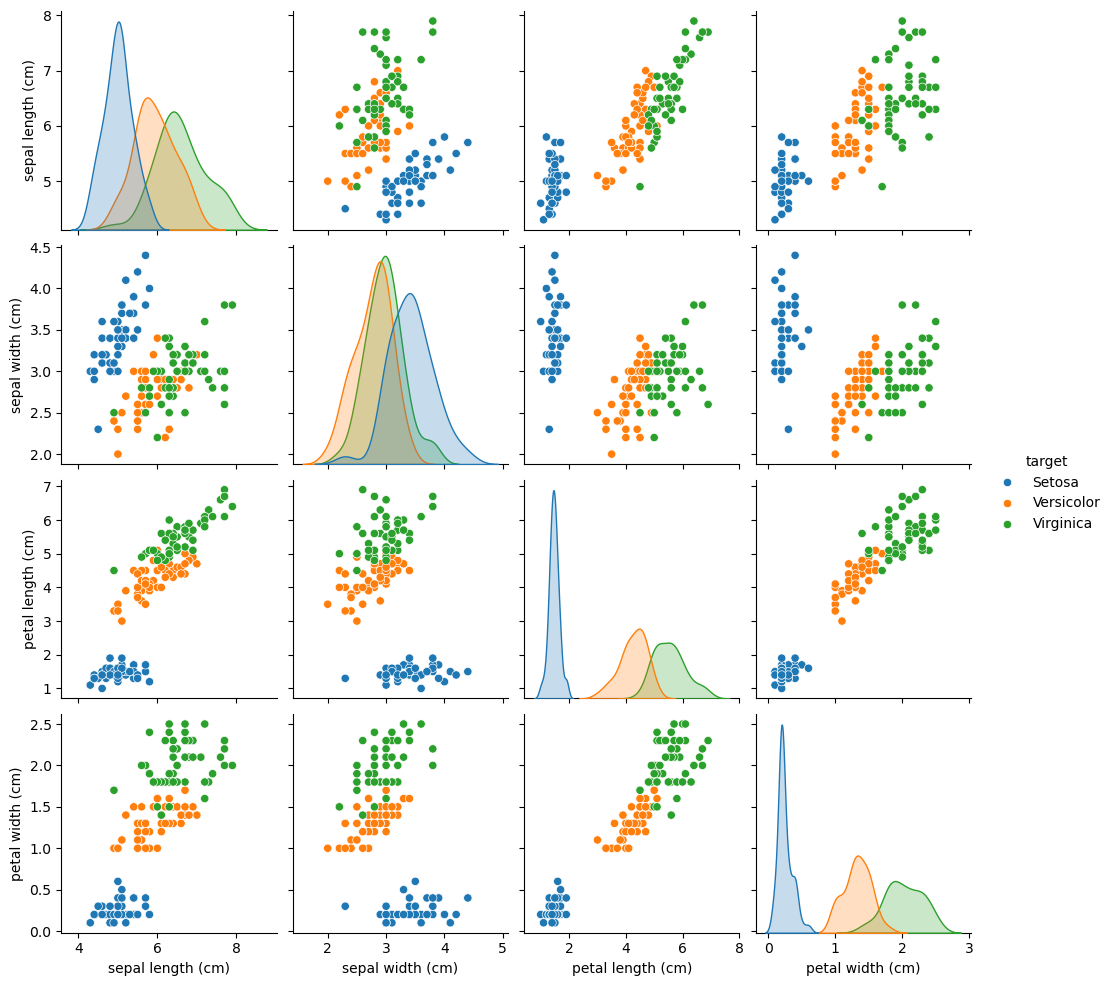

In [16]:
import seaborn as sns
sns.pairplot(data = df, hue='target')

In [17]:
X = df.drop('target', axis=1)
y = df['target']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [19]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred = log_reg.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

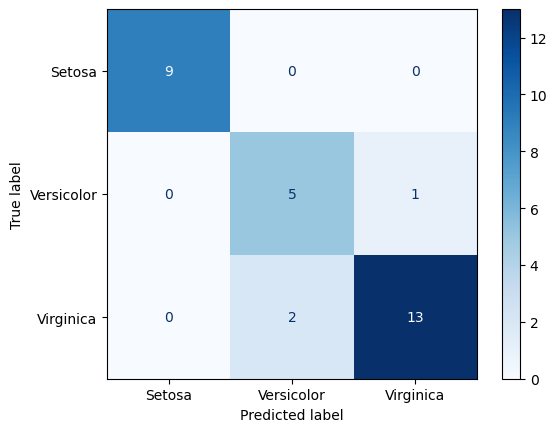

In [22]:
disp = ConfusionMatrixDisplay.from_estimator(
    log_reg,
    X_test,
    y_test,
    display_labels=['Setosa', 'Versicolor', 'Virginica'],
    cmap=plt.cm.Blues,
)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         9
  Versicolor       0.71      0.83      0.77         6
   Virginica       0.93      0.87      0.90        15

    accuracy                           0.90        30
   macro avg       0.88      0.90      0.89        30
weighted avg       0.91      0.90      0.90        30

